<center> <h1> <br>Machine Learning Internship Task <br>
<br>Job title : Classification by industry<br>
<br>(Multi-text Text Classification Task)<br> </h1> </center>

<br><b>Task Description:</b><br>
<br>Leveraging the use of a machine learning classifier to classify job titles by the industry.<br>

<br>Importing Libraries<br>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from imblearn.pipeline import make_pipeline

In [3]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler 
from sklearn.svm import SVC

In [4]:
from sklearn.metrics import accuracy_score

In [5]:
import gensim
from gensim.utils import simple_preprocess
from nltk.corpus import stopwords
import nltk
import re
import scipy.stats as stats
from matplotlib.pyplot import figure
import warnings
warnings.filterwarnings("ignore")

<center> <h1> Exploratory Data Analysis </h1> </center> 



### Data Attributes:

    1.  Job Title: the input predictor for the task.
    2.  Industry: the corresponding industry for the job title which will be the target class in this case.

In [6]:
#Reading the data, viewing the top part of the data
data  = pd.read_csv(r"Job titles and industries.csv")
data.head()

,job title,industry
0,technical support and helpdesk supervisor - co...,IT
1,senior technical support engineer,IT
2,head of it services,IT
3,js front end engineer,IT
4,network and telephony controller,IT


In [7]:
#data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8586 entries, 0 to 8585
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   job title  8586 non-null   object
 1   industry   8586 non-null   object
dtypes: object(2)
memory usage: 134.3+ KB


In [8]:
#data columns
data_heads=data.columns
data_heads

Index(['job title', 'industry'], dtype='object')

In [9]:
data.duplicated().value_counts()

True     4618
False    3968
dtype: int64

In [10]:
#Checking for duplicated values
duplicateRowsDF = data[data.duplicated()]
print("Duplicate Rows except first occurrence based on all columns are :")
print(duplicateRowsDF)

Duplicate Rows except first occurrence based on all columns are :
                                job title   industry
7     devops engineers x 3 - global brand         IT
10    devops engineers x 3 - global brand         IT
11    devops engineers x 3 - global brand         IT
26                       business analyst         IT
36                         .net developer         IT
...                                   ...        ...
8572                      telesales agent  Marketing
8575                        sales manager  Marketing
8576  marketing & social media specialist  Marketing
8580                 marketing specialist  Marketing
8582                      content creator  Marketing

[4618 rows x 2 columns]


In [11]:
#checking if the data has null values
data[data_heads].isnull().sum()

job title    0
industry     0
dtype: int64

In [12]:
#Data columns count, unique values and frequency of most occuring records 
data[data_heads].describe().T

,count,unique,top,freq
job title,8586,3890,marketing executive,91
industry,8586,4,IT,4746


In [13]:
data[data_heads].value_counts()[:30]

job title                                    industry 
marketing executive                          Marketing    90
trainee network technician                   IT           53
software developer                           IT           52
php developer                                IT           52
marketing manager                            Marketing    46
digital marketing executive                  Marketing    45
trainee it security technician               IT           45
social media specialist                      Marketing    43
trainee it support - no experience required  IT           42
english teacher                              Education    40
business analyst                             IT           39
marketing assistant                          Marketing    38
.net developer                               IT           37
software engineer                            IT           33
graphic designer                             Marketing    31
data analyst                  

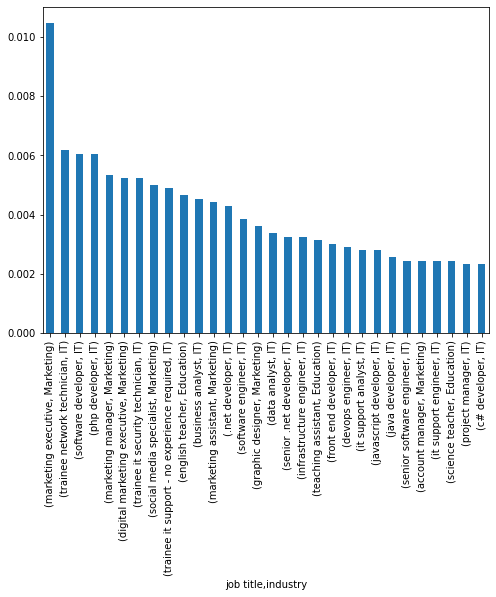

In [14]:
#plotting the most frequent titles by their probability
prob = data[data_heads].value_counts(normalize=True)[:30]
plt.figure(figsize=(8,6))
prob.plot(kind='bar')
plt.xticks(rotation=90)
plt.show()

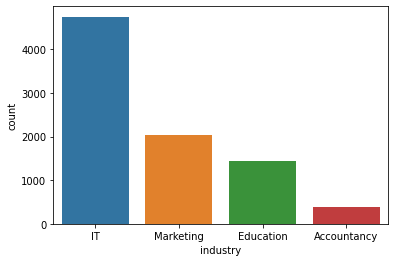

In [15]:
#counting the labels
sns.countplot(data["industry"])
plt.show()

As seen from the plot there is a significant class imbalance between the IT label and the rest of the labels

<center> <h1>Preprocessing </h1> </center>

<br><b>Preprocessing will consist of two main parts</b><br>
<br>-Text preprocessing<br>
<br>-Data preprocessing<br>

## Text Preprocessing

<br><b>Removing Stop Words</b><br>
<br>-Stop words are common words such as a, and, and the which have little significance to our job titles<br>
<br>-By combining the simple_preprocess function from gensim library and the stop_words set from the NLTK library to filter stopwords out of each job title.

In [16]:
stop_words = set(stopwords.words('english'))

In [17]:
def text_cleaning(frase):
    result = ""
    for token in simple_preprocess(frase):
        if token not in stop_words and len(token) >= 2:
            token = token.lower() 
            result += (token + " ")    
    return result

In [18]:
data["job title"] = data["job title"].map(text_cleaning)

## Data preprocessing

<br><b>Dealing with Class imbalance</b><br>

As noticed before in the EDA there is a signifcant class imbalance in the target labels.
<br>This will be rectified using the SMOTE library which is designed specifically to deal with Imbalanced Data.
<br>The SMOTE function will be added to the pipeline.

In [19]:
#Using Test-Train split for splitting the data

X_train, X_test, y_train, y_test = train_test_split(data['job title'],data['industry'], test_size=0.2)

<br><center> <h1>Pipeline Steps </h1> </center><br>
<br><b>1) TfidfVectorizer()</b> : Convert a collection of raw documents to a matrix of TF-IDF features.<br>
<br>In order to use this data for machine learning, we need to be able to convert the content of each string into a vector of numbers.<br>
<br>For this we will use the TF-IDF vectorizerand.<br>
<br><b>2) SMOTE():</b>  Synthetic Minority Oversampling Technique.<br>
<br> solve the problem of imbalanced data by oversampling the examples in the minority class.

<br><b>3) Machine Learning Models :</b><br>
<br>Using three different machine learning models for training<br>
<br>-<b>MultinomialNB:</b> Multinomial Naive Bayes classifier.<br>
<br>naive Bayes classifiers are a family of simple “probabilistic classifiers” based on applying Bayes’ theorem with strong (naive) independence assumptions between the features.<br>
<br>-<b>RandomForestClassifier:</b><br>
<br> Decision trees allow you to develop classification systems that predict or classify future observations based on a set of decision rules, a random forest is an ensemble of decision trees.<br>
<br>-<b>SVC:</b> C-Support Vector Classification.<br>
<br>Support vector machines (SVMs) are a set of supervised learning methods used for classification which is very effective in high dimensional spaces and is one the most popular learning methods used for NLP tasks<br>

In [20]:
#Creating Three pipelines for each machine learning model

model_mb = make_pipeline(TfidfVectorizer(),SMOTE(random_state=2), MultinomialNB())
model_svc = make_pipeline(TfidfVectorizer(),SMOTE(random_state=2),  SVC())
model_rf = make_pipeline(TfidfVectorizer(),SMOTE(random_state=2),  RandomForestClassifier())

In [21]:
#Fitting the models

model_mb.fit(X_train, y_train)
model_svc.fit(X_train, y_train)
model_rf.fit(X_train, y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('smote', SMOTE(random_state=2)),
                ('randomforestclassifier', RandomForestClassifier())])

In [22]:
#predicting labels

labels_mb = model_mb.predict(X_test)
labels_svc = model_svc.predict(X_test)
labels_rf = model_rf.predict(X_test)

In [23]:
#Evaluating Model Accuracy

from sklearn.metrics import classification_report
print("Multinomial Naive Bayes Classification Report\n")
print(classification_report(y_test, labels_mb))
print("\nSupport Vector Classifier Classification Report\n")
print(classification_report(y_test, labels_svc ))
print("\nRandom Forest Classifier Classification Report\n")
print(classification_report(y_test, labels_rf))

Multinomial Naive Bayes Classification Report

              precision    recall  f1-score   support

 Accountancy       0.67      0.93      0.78        69
   Education       0.94      0.87      0.90       283
          IT       0.97      0.93      0.95       965
   Marketing       0.83      0.90      0.86       401

    accuracy                           0.91      1718
   macro avg       0.85      0.91      0.87      1718
weighted avg       0.92      0.91      0.91      1718


Support Vector Classifier Classification Report

              precision    recall  f1-score   support

 Accountancy       0.84      0.84      0.84        69
   Education       0.96      0.88      0.92       283
          IT       0.96      0.97      0.97       965
   Marketing       0.89      0.91      0.90       401

    accuracy                           0.94      1718
   macro avg       0.91      0.90      0.91      1718
weighted avg       0.94      0.94      0.94      1718


Random Forest Classifier Classif

## Conclusion Support Vector Classifier
<br>SVC has the best overall accuracy, and a higher f1 score on average for all of the labels.<br>
<br>SVC will be the model of choice.<br>

## Improving the Model

<br><b>-Algorithm Tuning:</b><br> 
<br> through perfroming a GridSearch with cross-validation on different SVC parameters the accuracy could be further increased<br>
<br><b>-Larger dataset:</b><br> 
<br>Through providing the model with a larger dataset for training the model could be further increased in accuracy not necessarily for SVM but for all models used.<br>

## Limitations

<br><b>-Overlapping Targets:</b><br> 
<br> SVM does not perform very well when the data set has more noise i.e. target classes are overlapping.<br>
<br><b>-Duplicated Data:</b><br> 
<br> Diffculty in identifying duplicated data which adds to the model confusion.<br>

## References and grabs.

<br><a href="https://towardsdatascience.com/do-you-know-how-to-choose-the-right-machine-learning-algorithm-among-7-different-types-295d0b0c7f60">Algorithm Comparisons.</a><br>
<br><a href="https://towardsdatascience.com/build-and-compare-3-models-nlp-sentiment-prediction-67320979de61">NLP Models Comparisons.</a><br>
<br><a href="https://towardsdatascience.com/nlp-in-python-data-cleaning-6313a404a470">Cleaning Data NLP.</a><br>
<br><a href="https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9">Accuracy-precision-recall-or-f1 for evaluating classification models.</a><br>
<br><a href="https://www.researchgate.net/post/Is-it-possible-to-improve-SVM-evaluation">Improving SVM.</a><br>

In [24]:
#dumping the model
import pickle
pickle.dump(model_svc, open(r'../01_Code/model.pkl','wb'))